# **<center> Análisis de Sentimientos de los candidatos presidenciales </br> Ecuador 2021, en la red social Twitter </center>**
<h6>
    <center> Miguel Angel Macias, Jonnathan Campoberde <br/> 
    <i>Universidad de Cuenca <br/>  <i>Facultad de Ingenieria - Escuela de Sistemas<br/> Cuenca, Ecuador</i>
    <br/> { mangel.maciasn, jonnathan.campoberde }@ucuenca.edu.ec</center>
<h6>

# **I.&emsp;Introducción**
El presente trabajo tiene como objetivo emplear de manera práctica todos los conocimientos adquiridos en el transcurso de la asignatura “Text Mining”. Se trabajará con un dataset... . Se busca analizar el ..., detectando las ... por medio de ... . Todo esto con el propósito de ... .

## **1.1.&emsp;Objetivos del Proyecto**
>El objetivo del proyecto es el Análisis de Sentimientos de los candidatos presidenciales de Ecuador 2021, para luego contrastar los resultados obtenidos con los resultados oficiales de las elecciones Posteriormente se desea responder a las preguntas definidas en 1.2.

## **1.2.&emsp;Preguntas de investigación**
>- RQ1:     ¿Qué tan precisamente los datos de Twitter reflejan el sentimiento político en un proceso electoral?
>- RQ1:     ¿En qué grado de aceptación se encuentran los candidatos dentro de la red Social Twitter?
>- RQ3:     ¿Los resultadso oficiales son parecidos a los hallados en nuestro análisis?


# **IV.&emsp;SENTIMENT ANALYSIS**

## **4.1.&emsp; Reading dataset**
>Para este paso...

In [2]:
import warnings

import pytz

import numpy as np              # Para operaciones matematicas
import pandas as pd             # Manejo de datos / dataframes
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
#%matplotlib inline

In [3]:
data_raw = '../data/raw'              # directorio que contiene toda la data sin manipular
data_processed = '../data/processed'  # directorio que contiene data procesada

In [4]:
df_arauz_tag = pd.read_csv(data_processed+"/arauz_tag.csv")
df_arauz_tag['created_at'] = pd.to_datetime(df_arauz_tag['created_at'], utc=pytz.UTC)
df_arauz_tag['user.created_at'] = pd.to_datetime(df_arauz_tag['user.created_at'], utc=pytz.UTC)
df_arauz_tag

,created_at,favorite_count,full_text,id_str,metadata.iso_language_code,retweeted_status.created_at,retweeted_status.full_text,user.created_at,user.favourites_count,user.followers_count,user.friends_count,user.id_str,user.location,user.verified,retweet_count,is_troll,sentiment_tag,sentiment_sc
0,2021-02-01 00:00:00+00:00,1,elecciones2021ec las propuestas económicas de ...,1356029498307784705,es,NaN,NaN,2011-12-05 13:59:33+00:00,269,12756,288,429043466,Ecuador,False,0,False,Negativo,0.303537
1,2021-01-31 23:59:54+00:00,0,el candidato andrés arauz no aceptó responder ...,1356029470554128384,es,Sun Jan 31 15:51:12 +0000 2021,El candidato Andrés Arauz @ecuarauz no aceptó ...,2010-04-22 06:20:32+00:00,15211,1643,3233,135774682,Ombligo del mundo,False,154,False,Negativo,0.012758
2,2021-01-31 23:59:53+00:00,0,candidato del correísmo andrés arauz aumentó s...,1356029467274194946,es,Sun Jan 31 19:20:13 +0000 2021,"Candidato del Correísmo, Andrés Arauz aumentó ...",2020-11-24 03:29:03+00:00,10157,169,163,1331077287144517634,NaN,False,387,True,Negativo,0.011175
3,2021-01-31 23:59:30+00:00,0,eln habría prestado $80.000 para la campaña de...,1356029369324593155,es,Sun Jan 31 16:18:52 +0000 2021,#ELN habría prestado $80.000 para la campaña d...,2010-08-20 20:40:04+00:00,2653,197,226,180914917,Quito,False,23,False,Negativo,0.404774
4,2021-01-31 23:59:27+00:00,0,$1 000 a 1 millón de familias ayudará a dinami...,1356029360399151105,es,Sun Jan 31 14:02:07 +0000 2021,🇪🇨$1 000 A 1 MILLÓN DE FAMILIAS AYUDARÁ A DINA...,2011-12-07 02:30:28+00:00,24781,747,1006,430359745,Guayaquil,False,12,False,Negativo,0.046922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,2021-02-01 00:09:31+00:00,0,ilustrame porque se vendían los cdrs al 40% y ...,1356031890243858433,es,NaN,NaN,2019-09-30 18:22:03+00:00,802,53,552,1178736732826734599,NaN,False,0,False,Negativo,0.001778
12261,2021-02-01 00:07:41+00:00,3,es imperativo que saquemos a estas ratas y más...,1356031431550631937,es,NaN,NaN,2020-12-09 16:17:04+00:00,217,34,55,1336706385728430081,Las Palmas,False,0,True,Negativo,0.008126
12262,2021-02-01 00:04:17+00:00,19,según consejero esto es una infracción elector...,1356030576332066816,es,NaN,NaN,2020-12-11 02:59:34+00:00,2825,2294,1766,1337230403632050176,NaN,False,17,False,Negativo,0.034966
12263,2021-02-01 00:01:11+00:00,321,14 años el correismo nos ha estado robando y t...,1356029796665470977,es,NaN,NaN,2020-03-30 03:57:46+00:00,22591,4451,1717,1244473781923516416,NaN,False,114,False,Negativo,0.016784


## **4.2.&emsp; Exploratory Data Analysis**
>Para este paso...

In [5]:
#!pip install seaborn --upgrade

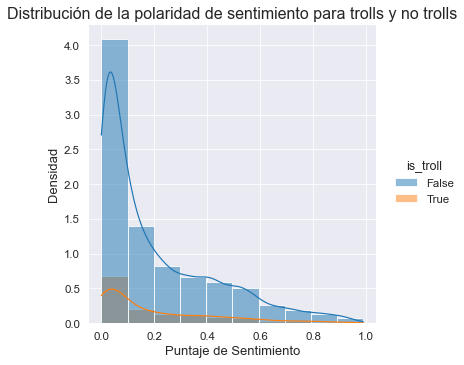

In [6]:
sns.set_style('darkgrid')
sns.set_context("paper", font_scale=1.3)

plt.figure(figsize=(12, 9))
g = sns.displot(df_arauz_tag, x="sentiment_sc", bins=10,
                hue="is_troll", stat="density", kde=True)
plt.title('Distribución de la polaridad de sentimiento para trolls y no trolls', fontsize=16)
plt.ylabel("Densidad", fontsize=13)
plt.xlabel("Puntaje de Sentimiento", fontsize=13)
plt.close(1)
plt.show()

#### _Null Data Analysis_
> Los datos nulos que se muestran a continuacion se deben a que no fueron "retwiteados", es decir, `8367` son tweets originales a secas que no fueron respondidos por nadie

In [7]:
df_arauz_tag.isnull().sum().reset_index().rename(columns={'index':'columna', 0:'datos nulos'}).style

,columna,datos nulos
0,created_at,0
1,favorite_count,0
2,full_text,0
3,id_str,0
4,metadata.iso_language_code,0
5,retweeted_status.created_at,8367
6,retweeted_status.full_text,8367
7,user.created_at,0
8,user.favourites_count,0
9,user.followers_count,0


In [8]:
def larger_axlim( axlim ):
    """ argument axlim expects 2-tuple 
        returns slightly larger 2-tuple """
    axmin,axmax = axlim
    axrng = axmax - axmin
    new_min = axmin
    new_max = axmax + 0.05 * axrng
    return new_min,new_max

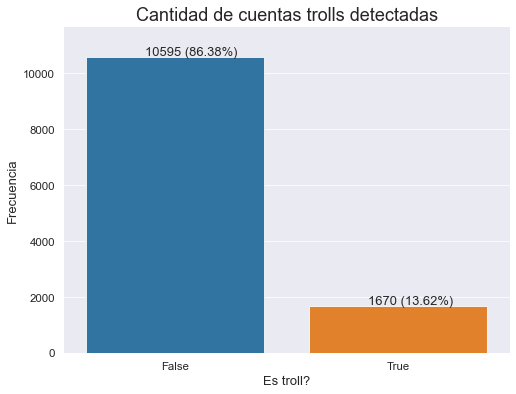

In [9]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x="is_troll", data=df_arauz_tag)
plt.title('Cantidad de cuentas trolls detectadas', fontsize=18)
plt.ylabel('Frecuencia', fontsize=13)
plt.xlabel('Es troll?', fontsize=13)

totalsize = df_arauz_tag['is_troll'].value_counts().sum()
ax.set_ylim(larger_axlim( ax.get_ylim()))

for p in ax.patches:
        ax.text(p.xy[0] + p.get_width()/3, p.xy[1] + p.get_height()+50, 
                str(round(p.get_height(), 3)) + " (" + 
                str(round(p.get_height()/totalsize*100,2)) + "%)", fontsize=13) 

plt.show();

#### _Ok_

## **4.3.&emsp; Positive/Negative/Neutral Sentiment Analysis**
>Para este paso...

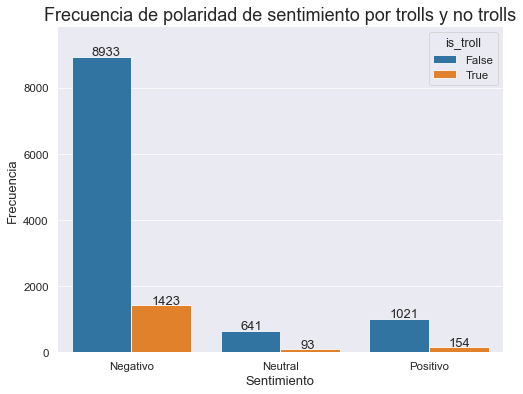

In [10]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x="sentiment_tag", hue="is_troll", data=df_arauz_tag)

plt.title('Frecuencia de polaridad de sentimiento por trolls y no trolls', fontsize=18)
plt.ylabel('Frecuencia', fontsize=13)
plt.xlabel('Sentimiento', fontsize=13)

ax.set_ylim(larger_axlim( ax.get_ylim()))

for p in ax.patches:
        ax.text(p.xy[0] + p.get_width()/3, p.xy[1] + p.get_height()+50, 
                str(round(p.get_height(), 3)), fontsize=13) 

plt.show();

In [11]:
arauz = df_arauz_tag.resample('3H', on='created_at', offset='00Min00s').sentiment_sc.mean()
arauz_time_series = pd.DataFrame({'created_at':arauz.index, 'sentiment_sc':arauz.values})
arauz_time_series.describe()

,sentiment_sc
count,116.000000
mean,0.205469
std,0.033783
min,0.110300
25%,0.184270
50%,0.204459
75%,0.229898
max,0.312697


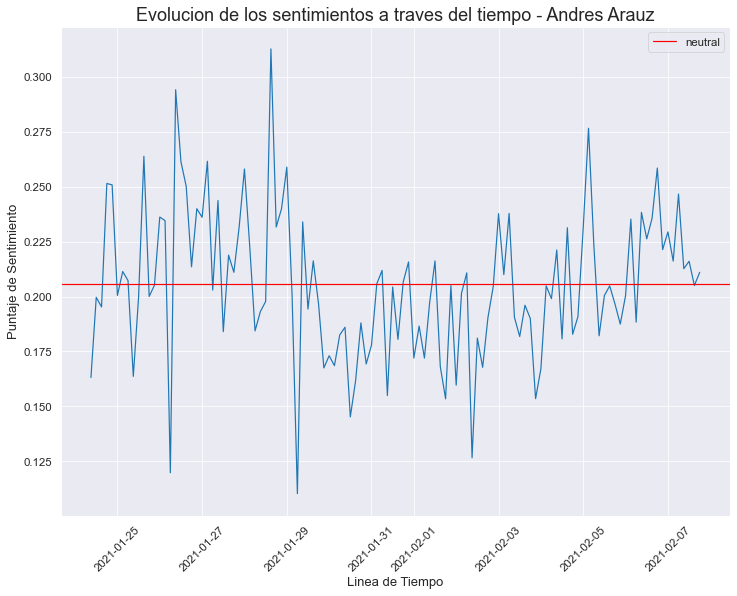

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 9))
ax = sns.lineplot(x="created_at", y="sentiment_sc", estimator='mean', data=arauz_time_series)
plt.title('Evolucion de los sentimientos a traves del tiempo - Andres Arauz', fontsize=18)
plt.ylabel('Puntaje de Sentimiento', fontsize=13)
plt.xlabel('Linea de Tiempo', fontsize=13)
plt.xticks(rotation=45)
ax.axhline(0.205645,color='red',label='neutral')
ax.legend()
plt.show()